# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset
dataset = pd.read_csv('nse_sensex.csv')

In [3]:
#Read dataset
dataset.head()

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,ASIANPAINT,EQ,883.55,882.0,885.60,876.9,879.7,878.75,880.60,294006,2.589019e+13,7988,149531,0.5086
1,2016-01-04,ASIANPAINT,EQ,878.75,876.2,892.45,871.7,880.5,880.80,881.96,709103,6.254040e+13,28981,337383,0.4758
2,2016-01-05,ASIANPAINT,EQ,880.80,881.3,905.00,881.3,901.4,900.65,898.75,1372748,1.233761e+14,52028,533231,0.3884
3,2016-01-06,ASIANPAINT,EQ,900.65,904.5,911.90,884.0,885.3,886.40,897.11,1716479,1.539873e+14,51374,1008881,0.5878
4,2016-01-07,ASIANPAINT,EQ,886.40,883.0,891.55,869.0,871.1,872.35,878.39,990333,8.698976e+13,26249,477288,0.4819


In [4]:
#Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40292 entries, 0 to 40291
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                40292 non-null  object 
 1   SYMBOL              40292 non-null  object 
 2   SERIES              40292 non-null  object 
 3   PREV CLOSE          40292 non-null  float64
 4   OPEN                40292 non-null  float64
 5   HIGH                40292 non-null  float64
 6   LOW                 40292 non-null  float64
 7   LAST                40292 non-null  float64
 8   CLOSE               40292 non-null  float64
 9   VWAP                40292 non-null  float64
 10  VOLUME              40292 non-null  int64  
 11  TURNOVER            40292 non-null  float64
 12  TRADES              40292 non-null  int64  
 13  DELIVERABLE VOLUME  40292 non-null  int64  
 14  %DELIVERBLE         40292 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 4.6+

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

/var/folders/ds/v3ns8p3s2hs70n834rjn5z2r0000gn/T/ipykernel_67536/3929276526.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr().round(2),annot=True, cmap='vlag')


<Axes: >

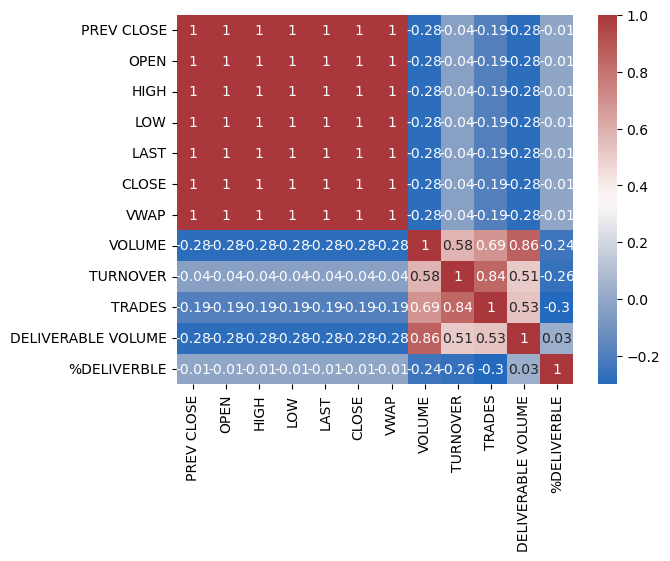

In [5]:
#Find strong correlation between two variables.
sns.heatmap(dataset.corr().round(2),annot=True, cmap='vlag')

array([[<Axes: title={'center': 'PREV CLOSE'}>,
        <Axes: title={'center': 'OPEN'}>,
        <Axes: title={'center': 'HIGH'}>],
       [<Axes: title={'center': 'LOW'}>,
        <Axes: title={'center': 'LAST'}>,
        <Axes: title={'center': 'CLOSE'}>],
       [<Axes: title={'center': 'VWAP'}>,
        <Axes: title={'center': 'VOLUME'}>,
        <Axes: title={'center': 'TURNOVER'}>],
       [<Axes: title={'center': 'TRADES'}>,
        <Axes: title={'center': 'DELIVERABLE VOLUME'}>,
        <Axes: title={'center': '%DELIVERBLE'}>]], dtype=object)

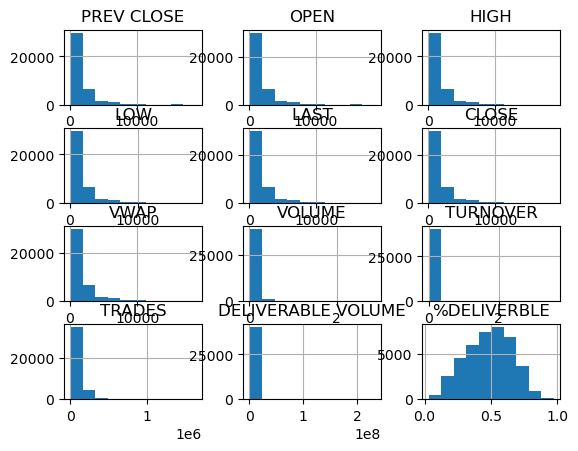

In [6]:
#Plot histograph.
dataset.hist()

In [7]:
#Plot pairplot
# sns.pairplot(dataset)

In [8]:
#Drop unnecessary columns.
dataset = dataset.drop(['SERIES','TURNOVER','TRADES','DELIVERABLE VOLUME','%DELIVERBLE'], axis = 1)

In [9]:
#Using only one company stock data at a time
dataset=dataset.loc[dataset['SYMBOL'] == 'ASIANPAINT']

In [10]:
#Checking dataset size
dataset.shape

(1171, 10)

In [11]:
#Asign Varibale for model
x = dataset[['OPEN','HIGH','LOW']]
y = dataset['CLOSE']

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [12]:
#Import required library to train your model.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,random_state = 0)

In [13]:
#Check train data size
x_train.shape

(878, 3)

In [14]:
#Check test data size.
x_test.shape

(293, 3)

In [15]:
# Check OLS regression report.
import statsmodels.api as sm

# Adding a constant to get an intercept
x_train_sm = sm.add_constant(x_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

# Printing the parameters
lr.params

# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CLOSE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.018e+05
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:15:04   Log-Likelihood:                -3169.8
No. Observations:                 878   AIC:                             6348.
Df Residuals:                     874   BIC:                             6367.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5873      0.945      0.621      0.535      -1.268       2.443
OPEN          -0.5615      0.023    -24.742      0.000      -0.606      -0.517
HIGH           0.7825      0.020     38.441      0.000       0.743       0.822
LOW            0.7784      0.024     32.004      0.000       0.731       0.826
==============================================================================
Omnibus:                       87.808   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              587.359
Skew:                          -0.077   Prob(JB):                    2.86e-128
Kurtosis:                       7.004   Cond. No.                     8.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Import libraries for Linear Regression. 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [17]:
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
print(regressor.coef_)

[-0.56148555  0.78251358  0.7783562 ]


In [19]:
print(regressor.intercept_)

0.5873144142879028


In [20]:
predicted = regressor.predict(x_test)

In [21]:
print(x_test)

        OPEN     HIGH      LOW
906   1631.0  1636.85  1595.95
974   1977.0  1983.90  1881.25
597   1233.9  1265.95  1233.90
328   1242.0  1259.95  1236.05
425   1128.0  1139.80  1124.00
...      ...      ...      ...
239   1135.0  1160.00  1134.00
110    995.0   999.00   978.60
1119  2539.1  2583.45  2521.50
1132  2600.0  2604.70  2528.80
303   1144.0  1159.95  1140.65

[293 rows x 3 columns]


In [22]:
dframe = pd.DataFrame(y_test,predicted)

In [23]:
dfr = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted, 'res':(y_test-predicted)})

In [24]:
print(dfr)

      Actual Price  Predicted Price        res
906        1619.45      1607.879320  11.570680
974        1899.10      1907.241684  -8.141684
597        1261.20      1258.807082   2.392918
328        1256.35      1251.237433   5.112567
425        1128.30      1134.012966  -5.712966
...            ...              ...        ...
239        1146.80      1153.672904  -6.872904
110         986.50       985.339640   1.160360
1119       2578.05      2559.129232  18.920768
1132       2553.65      2547.245176   6.404824
303        1157.30      1153.756477   3.543523

[293 rows x 3 columns]


In [25]:
#Import library for accuracy check.
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
#Check accuracy of model.
regressor.score(x_test,y_test)

0.999659905618537

In [27]:
import math

In [28]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 7.011656212541822


In [29]:
print('Root Mean Square error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Square error: 9.620778053598855


In [30]:
graph=dfr.head(20)

<Axes: >

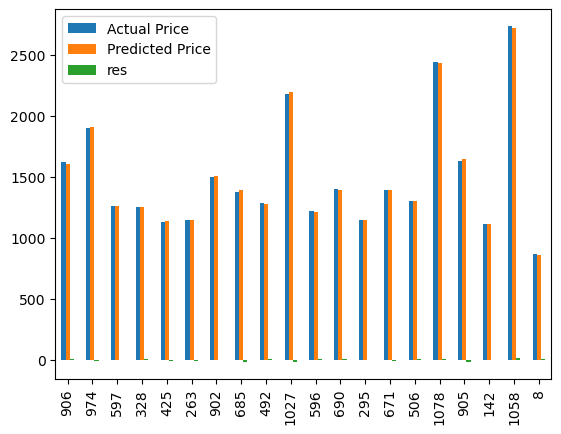

In [31]:
#Visualize data
graph.plot(kind='bar')

## Error Terms

Finally, plot your error terms!

/var/folders/ds/v3ns8p3s2hs70n834rjn5z2r0000gn/T/ipykernel_67536/1174847835.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


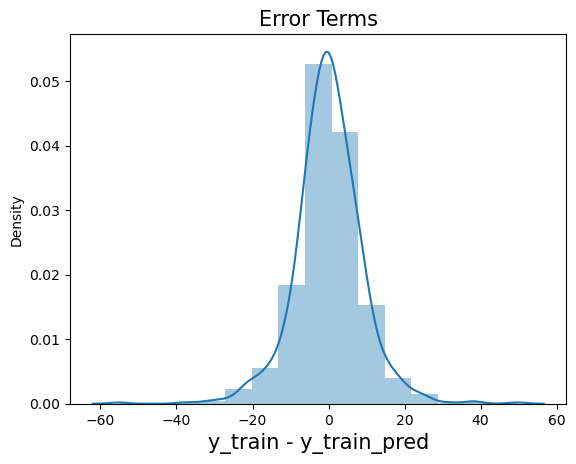

In [32]:
#To perform residual analysis

#Predicting y_value using training data of X
y_train_pred = lr.predict(x_train_sm)

#Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

#plot data
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [33]:
# fig = plt.figure()
# sns.histplot(dfr['res'])
# plt.title('Error Terms', fontsize = 15)
# plt.xlabel('Actual Price - Predictable Price', fontsize = 15)
# plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? - R-squared value is 1 (R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. An R-squared of 100% means that all of the movements of a security (or another dependent variable) are completely explained by movements in the index (or whatever independent variable you are interested in). In investing, a high R-squared, from 85% to 100%, indicates that the stock’s or fund’s performance moves relatively in line with the index. A fund with a low R-squared, at 70% or less, indicates that the fund does not generally follow the movements of the index.)
Formula for R2 = 1 - sum squared regression/total sum of Squares
source - https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=6%20See%20Also-,Definition,line%20approximates%20the%20actual%20data.
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? - Yes for this stock dataset linear regression model fit best.
3. Was your plot of the error terms a bell curve? - Yes.